In [1]:
%autosave 60
%matplotlib inline

Autosaving every 60 seconds


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import astropy

In [4]:
import astropy.units as u
import astropy.constants as c

In [5]:
c.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

In [11]:
SOLLAR_MASS = c.M_sun.to_value('g')
type(SOLLAR_MASS), SOLLAR_MASS

(numpy.float64, 1.988409870698051e+33)

In [10]:
type(c.M_sun.cgs)

astropy.units.quantity.Quantity

In [14]:
c.M_sun.cgs.value, c.M_sun.cgs.unitt

(1.988409870698051e+33, Unit("g"))

In [17]:
c.G.cgs.value

6.674299999999999e-08

In [20]:
x = 1 * u.km
x.to('au')

<Quantity 6.68458712e-09 AU>

In [21]:
x_val = x.to_value('pc')
type(x_val), x_val

(numpy.float64, 3.240779289469756e-14)

In [27]:
x = 10 * u.km
t = 1 * u.hour
v = x / t
v = v.to(u.cm / u.s)
v + 1 * u.mau / (10 * u.year)  # не используйте mau

<Quantity 325.18248241 cm / s>

In [30]:
(1 * u.kau).to(u.km)

<Quantity 1.49597871e+11 km>

In [31]:
(10 * u.mpc).to(u.pc)

<Quantity 0.01 pc>

In [32]:
10 * u.km + 7 * u.kg

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

In [33]:
v = 2 * np.pi * (1.0 * u.au) / (1.0 * u.year)
v.to(u.km / u.s)

<Quantity 29.78525437 km / s>

In [35]:
v = np.sqrt(c.G * c.M_sun / c.au)
v.to(u.km / u.s)

<Quantity 29.78469183 km / s>

In [39]:
x = (10 * u.kg) / (0.1 * u.M_jup)
print(x.to(u.dimensionless_unscaled))
np.exp(x)

5.268358048799662e-26


<Quantity 1.>

In [41]:
a = (10 * u.g) ** (1 / 3)  # не делайте так
a

<Quantity 2.15443469 g(1/3)>

In [45]:
(10 * u.g) ** (2 / 7 + 1 / 15)  # так тем более

<Quantity 2.25102829 g(0.35238095238095235)>

In [47]:
from fractions import Fraction as Fr

In [48]:
Fr(2, 7) + Fr(1, 15)

Fraction(37, 105)

In [49]:
(10 * u.g) ** (Fr(2, 7) + Fr(1, 15))

<Quantity 2.25102829 g(37/105)>

In [52]:
np.cos(100 * u.arcmin)

<Quantity 0.99957695>

In [57]:
delta_m = 1 * u.mag
mAB = 10 * u.ABmag
display(mAB.physical.to(u.erg / u.s / u.cm**2 / u.Hz))
m = mAB + delta_m
display(m.physical.to(u.erg / u.s / u.cm**2 / u.Hz))

<Quantity 3.63078055e-24 erg / (cm2 Hz s)>

<Quantity 1.44543977e-24 erg / (cm2 Hz s)>

In [61]:
m1 = u.Magnitude(10 * u.count / u.s)
m2 = u.Magnitude(1e4 * u.count / u.hour)
dm = (m1 - m2).decompose()
dm, dm.unit, dm.value

(<Magnitude -1.39075625 mag>, Unit("mag(1)"), -1.3907562519182182)

In [63]:
a = np.arange(10) * u.cm
a

<Quantity [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.] cm>

In [62]:
from astropy import coordinates as coord

In [64]:
coord.SkyCoord('01h23m45.6s -05d23m17s')

<SkyCoord (ICRS): (ra, dec) in deg
    (20.94, -5.38805556)>

In [67]:
coord.SkyCoord(ra=10 * u.deg + 30 * u.arcmin, dec=-10 * u.deg - 30 * u.arcmin)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.5, -10.5)>

In [69]:
coord.SkyCoord(ra=[1, 2, 3], dec=[5, 4, 3], unit=u.deg)

<SkyCoord (ICRS): (ra, dec) in deg
    [(1., 5.), (2., 4.), (3., 3.)]>

In [75]:
coord.SkyCoord(ra=[1, 2, 3], dec=[5, 4, 3], unit=['h', 'deg'])

<SkyCoord (ICRS): (ra, dec) in deg
    [(15., 5.), (30., 4.), (45., 3.)]>

In [77]:
coord.SkyCoord(l=5*u.deg, b=10*u.deg, frame='galactic')

<SkyCoord (Galactic): (l, b) in deg
    (5., 10.)>

In [80]:
c = coord.SkyCoord('01h23m45.6s -05d23m17s')
c.galactic, c.ra, c.dec

(<SkyCoord (Galactic): (l, b) in deg
     (143.86243489, -66.93715664)>,
 <Longitude 20.94 deg>,
 <Latitude -5.38805556 deg>)

In [81]:
from astropy.time import Time

In [82]:
t = Time.now() - np.arange(5) * u.hour
t

<Time object: scale='utc' format='datetime' value=[datetime.datetime(2020, 11, 23, 13, 1, 24, 237140)
 datetime.datetime(2020, 11, 23, 12, 1, 24, 237140)
 datetime.datetime(2020, 11, 23, 11, 1, 24, 237140)
 datetime.datetime(2020, 11, 23, 10, 1, 24, 237140)
 datetime.datetime(2020, 11, 23, 9, 1, 24, 237140)]>

In [83]:
loc = coord.EarthLocation.of_site('subaru')

In [85]:
loc.height

<Quantity 4139. m>

In [86]:
loc.geodetic

GeodeticLocation(lon=<Longitude -155.47611111 deg>, lat=<Latitude 19.82555556 deg>, height=<Quantity 4139. m>)

In [88]:
alt_az_frame = coord.AltAz(obstime=t, location=loc)

In [89]:
alt_az_frame

<AltAz Frame (obstime=[datetime.datetime(2020, 11, 23, 13, 1, 24, 237140)
 datetime.datetime(2020, 11, 23, 12, 1, 24, 237140)
 datetime.datetime(2020, 11, 23, 11, 1, 24, 237140)
 datetime.datetime(2020, 11, 23, 10, 1, 24, 237140)
 datetime.datetime(2020, 11, 23, 9, 1, 24, 237140)], location=(-5464468.1097167, -2493053.65044845, 2150943.60508102) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

<SkyCoord (ICRS): (ra, dec) in deg
    (20.94, -5.38805556)>

<SkyCoord (GCRS: obstime=[datetime.datetime(2020, 11, 23, 13, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 14, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 15, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 16, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 17, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 18, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 19, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 20, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 21, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 22, 9, 17, 801943)
 datetime.datetime(2020, 11, 23, 23, 9, 17, 801943)
 datetime.datetime(2020, 11, 24, 0, 9, 17, 801943)
 datetime.datetime(2020, 11, 24, 1, 9, 17, 801943)
 datetime.datetime(2020, 11, 24, 2, 9, 17, 801943)
 datetime.datetime(2020, 11, 24, 3, 9, 17, 801943)
 datetime.datetime(2020, 11, 24, 4, 9, 17, 801943)
 datetime.datetime(2020, 11, 24, 5, 9, 17, 801943)
 datetime.datetime(2020, 11, 24, 6, 9, 17, 801943)
 datetime.datetime(2020, 11, 24, 7, 9, 17, 801

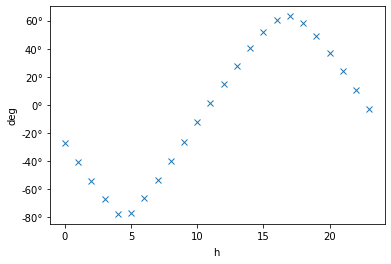

In [100]:
from astropy import visualization

display(c)
c.transform_to(alt_az_frame)
dt = np.arange(24) * u.hour
t = Time.now() + dt
moon = coord.get_moon(t)
display(moon)
alt_az_frame = coord.AltAz(obstime=t, location=loc)
moon_subaru = moon.transform_to(alt_az_frame)

with visualization.quantity_support():
    plt.plot(dt, moon_subaru.alt.to(u.deg), 'x')

In [101]:
coord.SkyCoord.from_name('M31')

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68470833, 41.26875)>

In [103]:
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier

In [104]:
m67 = Simbad.query_object('M67')
m67

<Table length=1>
 MAIN_ID     RA      DEC    ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
          "h:m:s"  "d:m:s"  ...                                            
  object   str13    str13   ...   str1        str1             object      
--------- -------- -------- ... -------- -------------- -------------------
NGC  2682 08 51 18 +11 48.0 ...        E                2005ApJ...619..824X

In [108]:
table = Simbad.query_region(coord.SkyCoord('08h51m18s +11d48m0s'),
                            radius=1 * u.arcmin)
table

<Table length=24>
          MAIN_ID                  RA      ...     COO_BIBCODE    
                                "h:m:s"    ...                    
           object                str13     ...        object      
---------------------------- ------------- ... -------------------
                   NGC  2682      08 51 18 ... 2005ApJ...619..824X
             NGC  2682   120 08 51 19.1814 ... 2018yCat.1345....0G
             CSI+11-08485  7    08 51 16.8 ...                    
             NGC  2682   105 08 51 17.0998 ... 2018yCat.1345....0G
 Cl* NGC 2682    FBC    3411 08 51 18.9766 ... 2018yCat.1345....0G
              [MS2015] NX 46   08 51 16.99 ... 2015MNRAS.452.3394M
 Cl* NGC 2682    FBC    3348 08 51 17.0531 ... 2018yCat.1345....0G
 Cl* NGC 2682    FBC    3424 08 51 19.2153 ... 2018yCat.1345....0G
                    LB  6340   08 51 18.92 ... 1963LB....C32....1L
                         ...           ... ...                 ...
             NGC  2682    95 08 51 15.4466 ... 2018yCat.1345....0G
            [VTB2004] CX  74   08 51 15.85 ... 2004A&A...418..509V
Cl* NGC 2682     ES    I-202 08 51 21.3227 ... 2018yCat.1345....0G
                    LB  6339 08 51 19.9095 ... 2018yCat.1345....0G
Cl* NGC 2682     ES    I-204 08 51 20.7046 ... 2018yCat.1345....0G
 Cl* NGC 2682    FBC    3314 08 51 16.0782 ... 2018yCat.1345....0G
 Gaia DR2 604917487620856192 08 51 16.3283 ... 2018yCat.1345....0G
             [BVM98] M 67 23    08 51 20.6 ...                    
 Cl* NGC 2682   SAND     999 08 51 18.6868 ... 2018yCat.1345....0G
             NGC  2682    91 08 51 14.7599 ... 2018yCat.1345....0G

In [111]:
m67 = Simbad.query_object('M67')
# coord.SkyCoord.guess_from_table(m67)
center = coord.SkyCoord(ra=m67['RA'], dec=m67['DEC'],
                        unit=(u.hourangle, u.deg))
center

<SkyCoord (ICRS): (ra, dec) in deg
    [(132.825, 11.8)]>

In [116]:
vizier = Vizier(
    row_limit=10000,
)

tmass_table = vizier.query_region(
    center,
    radius=5 * u.arcmin,
    catalog='2MASS',
)[0]
display(tmass_table)
tmass = coord.SkyCoord(ra=tmass_table['RAJ2000'],
                       dec=tmass_table['DEJ2000'],
                       unit='deg')

sdss_table = vizier.query_region(
    center,
    radius=5 * u.arcmin,
    catalog='SDSS7',
)[0]
display(sdss_table)
sdss = coord.SkyCoord(ra=sdss_table['RA_ICRS'],
                      dec=sdss_table['DE_ICRS'],
                      unit='deg')

<Table length=271>
  _q   RAJ2000    DEJ2000        _2MASS      ...  Bflg   Cflg   Xflg  Aflg
         deg        deg                      ...                          
int32  float64    float64       bytes17      ... bytes3 bytes3 uint8 uint8
----- ---------- ---------- ---------------- ... ------ ------ ----- -----
    1 132.810285  11.743501 08511446+1144366 ...    222    ccc     0     0
    1 132.810279  11.744696 08511446+1144409 ...    222    ccc     0     0
    1 132.793054  11.730462 08511033+1143496 ...    111    000     0     0
    1 132.806171  11.740373 08511348+1144253 ...    100    000     0     0
    1 132.786225  11.733243 08510869+1143596 ...    110    000     0     0
    1 132.817854  11.742462 08511628+1144328 ...    111    000     0     0
    1 132.839180  11.733575 08512140+1144008 ...    111    cc0     0     0
    1 132.840989  11.721581 08512183+1143176 ...    111    000     0     0
    1 132.848917  11.736172 08512374+1144102 ...    111    000     0     0
  ...        ...        ...              ... ...    ...    ...   ...   ...
    1 132.892817  11.828841 08513427+1149438 ...    111    000     0     0
    1 132.892725  11.848458 08513425+1150544 ...    111    000     0     0
    1 132.886145  11.841920 08513267+1150309 ...    111    000     0     0
    1 132.883952  11.834337 08513214+1150036 ...    111    000     0     0
    1 132.885801  11.814464 08513259+1148520 ...    111    000     0     0
    1 132.885731  11.844612 08513257+1150406 ...    111    000     0     0
    1 132.802904  11.878436 08511269+1152423 ...    111    000     0     0
    1 132.833993  11.879987 08512015+1152479 ...    111    000     0     0
    1 132.856334  11.877449 08512552+1152388 ...    111    000     0     0
    1 132.840646  11.877172 08512175+1152378 ...    111    000     0     0

<Table length=1401>
  _q   mode   cl          SDSS        ...  RA_ICRS    DE_ICRS    ObsDate    Q  
                                      ...    deg        deg         yr         
int32 uint8 uint8       bytes19       ...  float64    float64    float64  uint8
----- ----- ----- ------------------- ... ---------- ---------- --------- -----
    1     2     3 J085116.77+114829.2 ... 132.819886  11.808115 2006.0844     3
    1     1     6 J085116.78+115038.8 ... 132.819920  11.844135 2005.9314     3
    1     2     6 J085116.78+115038.9 ... 132.819926  11.844151 2006.0161     3
    1     1     6 J085116.81+114541.6 ... 132.820053  11.761561 2005.9314     3
    1     1     3 J085116.81+114807.4 ... 132.820063  11.802067 2005.9314     3
    1     2     6 J085116.81+114541.6 ... 132.820069  11.761566 2006.0844     3
    1     1     6 J085116.85+114938.6 ... 132.820234  11.827405 2005.9314     3
    1     2     6 J085116.85+114938.6 ... 132.820239  11.827412 2006.0161     3
    1     1     6 J085116.97+115009.3 ... 132.820726  11.835924 2005.9314     3
  ...   ...   ...                 ... ...        ...        ...       ...   ...
    1     2     6 J085116.32+114711.3 ... 132.818016  11.786476 2006.0844     3
    1     2     6 J085116.43+114834.3 ... 132.818471  11.809527 2006.0161     3
    1     1     6 J085116.46+114607.3 ... 132.818608  11.768719 2005.9314     3
    1     1     6 J085116.47+114900.1 ... 132.818628  11.816693 2005.9314     3
    1     2     6 J085116.47+114900.1 ... 132.818630  11.816701 2006.0161     3
    1     2     6 J085116.50+114723.9 ... 132.818769  11.789983 2006.0844     3
    1     2     3 J085116.61+114529.3 ... 132.819241  11.758138 2006.0844     3
    1     1     3 J085116.65+114528.9 ... 132.819412  11.758052 2005.9314     3
    1     1     6 J085116.68+114529.3 ... 132.819537  11.758144 2005.9314     3
    1     2     6 J085116.69+114529.3 ... 132.819564  11.758164 2006.0844     3

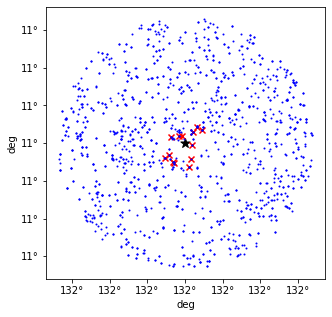

In [137]:
tmass_close = tmass[center.separation(tmass) < 1 * u.arcmin]

plt.figure(figsize=(5,5))
with visualization.quantity_support():
    plt.scatter(center.ra, center.dec, color='k', marker='*', s=96)
    plt.scatter(tmass_close.ra, tmass_close.dec, marker='x',
                color='red')
    plt.scatter(sdss.ra, sdss.dec, marker='.', color='blue', s=4)

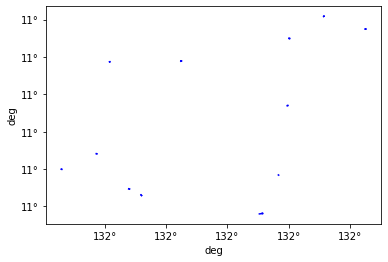

In [148]:
idx_tmass, idx_sdss, sep, dist = sdss.search_around_sky(
    tmass_close,
    1*u.arcsec,
)
with visualization.quantity_support():
    for a, b in zip(tmass[idx_tmass], sdss[idx_sdss]):
        plt.plot(u.Quantity([a.ra, b.ra]), u.Quantity([a.dec, b.dec]),
                 '-', color='blue')

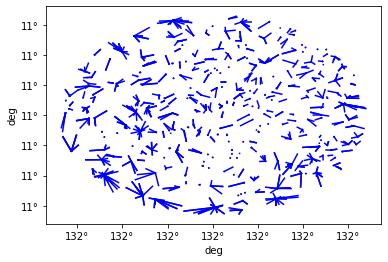

In [151]:
idx_tmass, sep, dist = sdss.match_to_catalog_sky(tmass)

with visualization.quantity_support():
    for a, b in zip(tmass[idx_tmass], sdss):
        plt.plot(u.Quantity([a.ra, b.ra]), u.Quantity([a.dec, b.dec]),
                 '-', color='blue')